<a href="https://colab.research.google.com/github/shafia2801/Intel/blob/main/comic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers

CUDA Available: True
CUDA Device: Tesla T4
Generating comic for prompt: 'A robot learning to paint discovers that art is the universal language'
Loading text generation model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0


Text generation model loaded successfully!
Generating story...
Generated Introduction panel
Generated Storyline panel
Generated Climax panel
Generated Resolution panel

--- Generated Story ---

Panel 1: Introduction
Text: A robot learning to paint discovers that art is the universal language
Dialogue: Panel 1 dialogue

Panel 2: Storyline
Text: A robot learning to paint discovers that art is the universal language
Dialogue: Panel 2 dialogue

Panel 3: Climax
Text: A robot learning to paint discovers that art is the universal language
Dialogue: Panel 3 dialogue

Panel 4: Resolution
Text: A robot learning to paint discovers that art is the universal language 3.
Dialogue: Panel 4 dialogue
Loading image generation model...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Image generation model loaded successfully!

Generating image for panel 1...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 2...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 3...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 4...


  0%|          | 0/30 [00:00<?, ?it/s]


Assembling comic...

Comic saved to comic_output/comic_1743845606.png


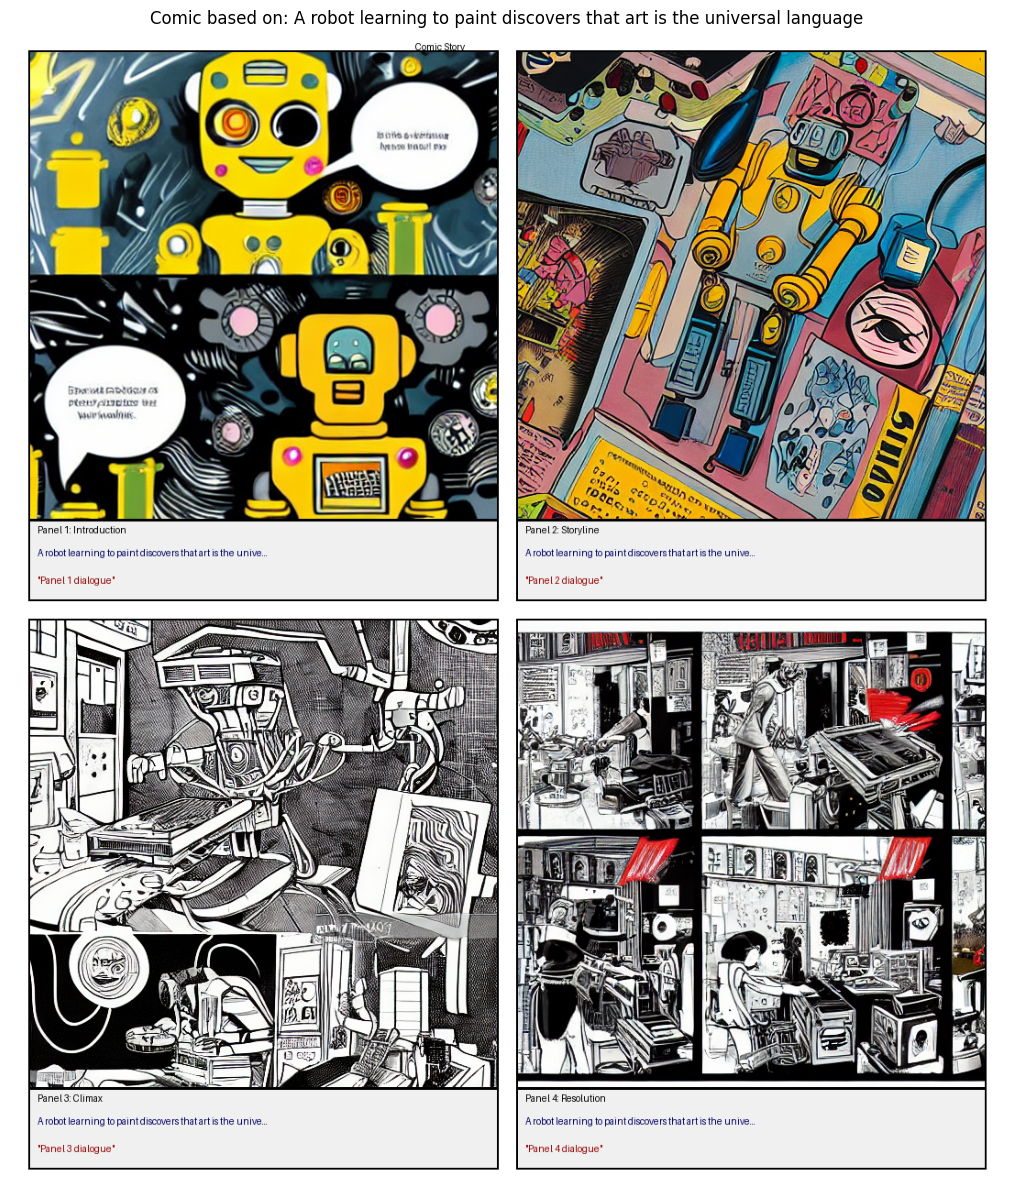

In [ ]:
# ComicCrafter AI - Simplified for Google Colab
# Create a new Python file with this code and run it directly in Colab

import os
import json
import time
import torch
from PIL import Image, ImageDraw, ImageFont
import io
import base64
import matplotlib.pyplot as plt
from transformers import pipeline, T5ForConditionalGeneration, T5Tokenizer
from diffusers import StableDiffusionPipeline

# Create output directory
os.makedirs("comic_output", exist_ok=True)

# Print GPU info
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")

# --------------------------------
# PHASE 1: LLM STORY GENERATION
# --------------------------------

class StoryGenerator:
    def __init__(self):
        """Initialize story generator with a T5 model (reliable on Colab)"""
        print("Loading text generation model...")
        # Use a smaller text generation model that's reliable on Colab
        # T5 models are stable and work well for structured generation
        self.model_name = "google/flan-t5-base"
        self.tokenizer = T5Tokenizer.from_pretrained(self.model_name)
        self.model = T5ForConditionalGeneration.from_pretrained(self.model_name).to("cuda")
        self.generator = pipeline("text2text-generation", model=self.model, tokenizer=self.tokenizer, device=0)
        print("Text generation model loaded successfully!")

    def generate_story(self, prompt):
        """Generate a structured comic story based on the user prompt."""
        print("Generating story...")

        # For each panel, generate content in a structured format
        panels = []
        panel_types = ["Introduction", "Storyline", "Climax", "Resolution"]

        for i, panel_type in enumerate(panel_types):
            # Create a specific prompt for each panel
            panel_prompt = f"""
            Create a {panel_type.lower()} panel for a comic about: {prompt}

            Include:
            1. A brief description (30-50 words)
            2. One line of dialogue
            3. Detailed visual description for an image

            Format: Description | Dialogue | Visual
            """

            # Generate content for this panel
            response = self.generator(panel_prompt, max_length=200, do_sample=True, temperature=0.7)
            content = response[0]['generated_text']

            # Parse the content (handle potential formatting issues)
            try:
                parts = content.split('|')
                if len(parts) >= 3:
                    text = parts[0].strip()
                    dialogue = parts[1].strip()
                    image_prompt = parts[2].strip()
                else:
                    # Fallback if format is not as expected
                    text = content[:100].strip()
                    dialogue = f"Panel {i+1} dialogue"
                    image_prompt = f"Comic panel showing {panel_type.lower()} about {prompt}, detailed illustration"
            except:
                # Fallback for any parsing errors
                text = f"Panel {i+1}: {panel_type}"
                dialogue = f"Panel {i+1} dialogue"
                image_prompt = f"Comic panel showing {panel_type.lower()} about {prompt}, detailed illustration"

            # Add panel to the collection
            panels.append({
                "panel": i+1,
                "type": panel_type,
                "text": text,
                "dialogue": dialogue,
                "image_prompt": image_prompt
            })

            print(f"Generated {panel_type} panel")

        return panels

# --------------------------------
# PHASE 2: IMAGE GENERATION
# --------------------------------

class ImageGenerator:
    def __init__(self):
        """Initialize image generator with Stable Diffusion."""
        print("Loading image generation model...")
        # Use a reliable SD model that works on Colab
        self.model_id = "runwayml/stable-diffusion-v1-5"
        self.pipe = StableDiffusionPipeline.from_pretrained(
            self.model_id,
            torch_dtype=torch.float16,
            safety_checker=None  # Disable for performance
        )
        self.pipe = self.pipe.to("cuda")
        # Enable memory optimization techniques
        self.pipe.enable_attention_slicing()
        print("Image generation model loaded successfully!")

    def generate_image(self, prompt, style="comic"):
        """Generate an image for a comic panel."""
        # Enhance the prompt with comic book styling
        styles = {
            "comic": "comic book style, detailed illustration",
            "manga": "manga style, black and white",
            "superhero": "superhero comic style, dynamic pose",
            "cartoon": "cartoon style, colorful and vibrant"
        }

        style_prompt = styles.get(style, styles["comic"])
        enhanced_prompt = f"{style_prompt}, {prompt}"

        # Generate the image
        with torch.autocast("cuda"):
            image = self.pipe(
                enhanced_prompt,
                guidance_scale=7.5,
                num_inference_steps=30,
                height=512,
                width=512
            ).images[0]

        return image

# --------------------------------
# PHASE 3: COMIC ASSEMBLY
# --------------------------------

class ComicAssembler:
    def __init__(self):
        """Initialize comic assembler with default settings."""
        # Try to load a common font, fallback if not available
        try:
            self.font_title = ImageFont.truetype("DejaVuSans.ttf", 36)
            self.font_text = ImageFont.truetype("DejaVuSans.ttf", 18)
            self.font_dialogue = ImageFont.truetype("DejaVuSans.ttf", 16)
        except:
            # Fallback to default
            self.font_title = ImageFont.load_default()
            self.font_text = ImageFont.load_default()
            self.font_dialogue = ImageFont.load_default()

    def assemble_comic(self, story_data, images):
        """Assemble comic from story data and images."""
        # Calculate dimensions (2x2 grid)
        panel_width = 512
        panel_height = 600  # Image + text area
        border = 20
        comic_width = panel_width * 2 + border * 3
        comic_height = panel_height * 2 + border * 3

        # Create canvas
        comic = Image.new('RGB', (comic_width, comic_height), (255, 255, 255))
        draw = ImageDraw.Draw(comic)

        # Draw title
        title_text = "Comic Story"
        draw.text((comic_width // 2 - 100, border // 2), title_text, fill=(0, 0, 0), font=self.font_title)

        # Place panels
        for i, (panel, image) in enumerate(zip(story_data, images)):
            row = i // 2
            col = i % 2

            # Panel position
            x = border + col * (panel_width + border)
            y = border + row * (panel_height + border)

            # Place image
            comic.paste(image, (x, y))

            # Draw panel frame
            draw.rectangle([x, y, x + panel_width, y + panel_height - 88], outline=(0, 0, 0), width=2)

            # Draw text background
            draw.rectangle([x, y + panel_width, x + panel_width, y + panel_height], fill=(240, 240, 240), outline=(0, 0, 0), width=2)

            # Draw panel text
            # Panel number/type
            draw.text((x + 10, y + panel_width + 5), f"Panel {panel['panel']}: {panel['type']}",
                     fill=(0, 0, 0), font=self.font_text)

            # Panel description (wrapped to fit)
            text = panel['text']
            if len(text) > 60:
                text = text[:57] + "..."
            draw.text((x + 10, y + panel_width + 30), text, fill=(0, 0, 100), font=self.font_text)

            # Dialogue
            dialogue = panel['dialogue']
            if len(dialogue) > 40:
                dialogue = dialogue[:37] + "..."
            draw.text((x + 10, y + panel_width + 60), f'"{dialogue}"', fill=(150, 0, 0), font=self.font_dialogue)

        return comic

# --------------------------------
# MAIN FUNCTION
# --------------------------------

def generate_comic(prompt, style="comic"):
    """Main function to generate a complete comic."""
    print(f"Generating comic for prompt: '{prompt}'")

    # Phase 1: Generate story
    story_gen = StoryGenerator()
    story_data = story_gen.generate_story(prompt)

    # Display story
    print("\n--- Generated Story ---")
    for panel in story_data:
        print(f"\nPanel {panel['panel']}: {panel['type']}")
        print(f"Text: {panel['text']}")
        print(f"Dialogue: {panel['dialogue']}")

    # Phase 2: Generate images
    image_gen = ImageGenerator()
    images = []
    for i, panel in enumerate(story_data):
        print(f"\nGenerating image for panel {i+1}...")
        image = image_gen.generate_image(panel['image_prompt'], style)
        images.append(image)

    # Phase 3: Assemble comic
    print("\nAssembling comic...")
    assembler = ComicAssembler()
    comic = assembler.assemble_comic(story_data, images)

    # Save and display the comic
    timestamp = int(time.time())
    filename = f"comic_output/comic_{timestamp}.png"
    comic.save(filename)
    print(f"\nComic saved to {filename}")

    # Display using matplotlib
    plt.figure(figsize=(15, 15))
    plt.imshow(comic)
    plt.axis('off')
    plt.title(f"Comic based on: {prompt}")
    plt.show()

    return comic, story_data



Enter your story prompt: sad story
Choose a style (comic, manga, superhero, or cartoon): comic
Generating comic for prompt: 'sad story'
Loading text generation model...


Device set to use cuda:0


Text generation model loaded successfully!
Generating story...
Generated Introduction panel
Generated Storyline panel
Generated Climax panel
Generated Resolution panel

--- Generated Story ---

Panel 1: Introduction
Text: a sad story
Dialogue: Panel 1 dialogue

Panel 2: Storyline
Text: The bad news is that her parents resigned from her job.
Dialogue: Panel 2 dialogue

Panel 3: Climax
Text: A sad story about a man who is now dead.
Dialogue: Panel 3 dialogue

Panel 4: Resolution
Text: 1. a comic about sad story 2. a comic describing sadness 3. a comic about a sad story
Dialogue: Panel 4 dialogue
Loading image generation model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Image generation model loaded successfully!

Generating image for panel 1...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 2...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 3...


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image for panel 4...


  0%|          | 0/30 [00:00<?, ?it/s]


Assembling comic...

Comic saved to comic_output/comic_1743845678.png


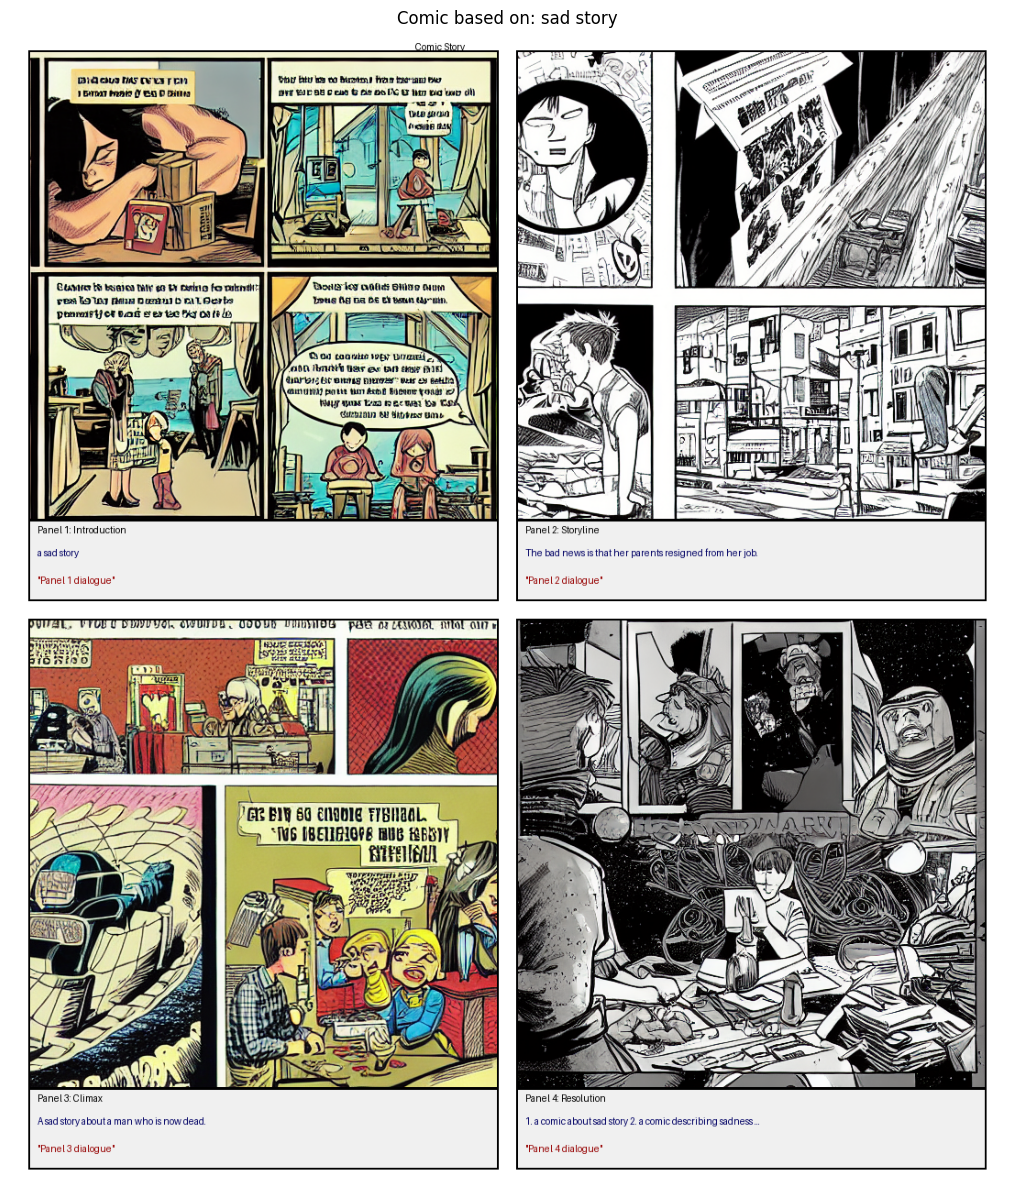

In [ ]:
# Get the story prompt from user input
my_prompt = input("Enter your story prompt: ")

# Choose a style: "comic", "manga", "superhero", or "cartoon"
my_style = input("Choose a style (comic, manga, superhero, or cartoon): ")

# Generate the comic
comic,story = generate_comic(my_prompt, my_style)